In [2]:
import pandas as pd
import numpy as np

In [3]:
df1=pd.read_csv("/home/rsingla1/project_data_latest.csv")

In [4]:
bins=[-1,2,6,10,11]
group_names=['0','1','2','3']
df1['performance']=pd.cut(df1['playoff_wins'],bins,labels=group_names)
df2=df1[["performance"]]


In [5]:
df1.columns

Index(['year', 'Tm', 'playoff_wins', 'world_series_ind', 'round', 'hit_numBat',
       'hit_BatAge', 'hit_RG', 'hit_G', 'hit_PA', 'hit_AB', 'hit_R_scored',
       'hit_H', 'hit_2B', 'hit_3B', 'hit_HR', 'hit_RBI', 'hit_SB', 'hit_CS',
       'hit_BB', 'hit_SO', 'hit_BA', 'hit_OBP', 'hit_SLG', 'hit_OPS',
       'hit_OPS+', 'hit_TB', 'hit_GDP', 'hit_HBP', 'hit_SH', 'hit_SF',
       'hit_IBB', 'hit_LOB', 'pitch_numP', 'pitch_PAge', 'pitch_RAG',
       'pitch_W', 'pitch_L', 'pitch_WL', 'pitch_ERA', 'pitch_G', 'pitch_GS',
       'pitch_GF', 'pitch_CG', 'pitch_tSho', 'pitch_cSho', 'pitch_SV',
       'pitch_IP', 'pitch_H', 'pitch_R_allowed', 'pitch_ER', 'pitch_HR',
       'pitch_BB', 'pitch_IBB', 'pitch_SO', 'pitch_HBP', 'pitch_BK',
       'pitch_WP', 'pitch_BF', 'pitch_ERAplus', 'pitch_FIP', 'pitch_WHIP',
       'pitch_H9', 'pitch_HR9', 'pitch_BB9', 'pitch_SO9', 'pitch_SOW',
       'pitch_LOB', 'performance'],
      dtype='object')

In [6]:
df1.drop(["round","playoff_wins","performance","Tm","world_series_ind"],axis=1,inplace=True)

In [7]:
#use linear regression as the model for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
name=df1.columns.values
name
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(df1,df2)
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_),name)))

Features sorted by their rank:
[(1, 'hit_OBP'), (2, 'hit_OPS'), (3, 'hit_SLG'), (4, 'hit_BA'), (5, 'pitch_WHIP'), (6, 'pitch_BB9'), (7, 'pitch_H9'), (8, 'pitch_HR9'), (9, 'pitch_FIP'), (10, 'pitch_WL'), (11, 'hit_RG'), (12, 'pitch_ERA'), (13, 'pitch_SOW'), (14, 'pitch_SO9'), (15, 'pitch_W'), (16, 'pitch_GS'), (17, 'pitch_G'), (18, 'hit_G'), (19, 'pitch_RAG'), (20, 'pitch_PAge'), (21, 'pitch_CG'), (22, 'pitch_GF'), (23, 'hit_BatAge'), (24, 'pitch_ER'), (25, 'pitch_H'), (26, 'pitch_BB'), (27, 'pitch_IP'), (28, 'pitch_cSho'), (29, 'pitch_BK'), (30, 'hit_H'), (31, 'hit_AB'), (32, 'hit_SF'), (33, 'hit_SH'), (34, 'hit_PA'), (35, 'pitch_L'), (36, 'pitch_SO'), (37, 'hit_LOB'), (38, 'pitch_LOB'), (39, 'pitch_BF'), (40, 'pitch_R_allowed'), (41, 'hit_TB'), (42, 'hit_RBI'), (43, 'pitch_tSho'), (44, 'hit_HR'), (45, 'pitch_numP'), (46, 'hit_BB'), (47, 'hit_HBP'), (48, 'hit_GDP'), (49, 'year'), (50, 'hit_CS'), (51, 'pitch_WP'), (52, 'pitch_HBP'), (53, 'hit_R_scored'), (54, 'hit_2B'), (55, 'pitch_HR')

/usr/lib64/python3.4/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# Feature Selection using Extra Tree Classifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(df1,df2)
#y=k_scores.append(x.mean())
# display the relative importance of each attribute
print (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_),name), 
             reverse=True))

[(0.028400000000000002, 'hit_SO'), (0.027199999999999998, 'pitch_HBP'), (0.027099999999999999, 'hit_OBP'), (0.025999999999999999, 'hit_CS'), (0.023400000000000001, 'pitch_WP'), (0.023, 'pitch_BK'), (0.0223, 'hit_IBB'), (0.022200000000000001, 'hit_TB'), (0.021600000000000001, 'pitch_tSho'), (0.021100000000000001, 'pitch_WHIP'), (0.0207, 'hit_HR'), (0.020500000000000001, 'hit_2B'), (0.0201, 'hit_3B'), (0.02, 'pitch_SV'), (0.019599999999999999, 'pitch_ERAplus'), (0.019599999999999999, 'hit_BB'), (0.019300000000000001, 'pitch_ER'), (0.018800000000000001, 'hit_H'), (0.018700000000000001, 'pitch_BB9'), (0.0184, 'pitch_PAge'), (0.0184, 'pitch_HR'), (0.017999999999999999, 'pitch_numP'), (0.017299999999999999, 'hit_OPS+'), (0.016799999999999999, 'pitch_BF'), (0.016400000000000001, 'hit_BA'), (0.016299999999999999, 'pitch_R_allowed'), (0.016299999999999999, 'hit_HBP'), (0.016199999999999999, 'hit_BatAge'), (0.0161, 'pitch_SO9'), (0.016, 'hit_LOB'), (0.015900000000000001, 'pitch_BB'), (0.01559999

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [9]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf = RandomForestRegressor()
rf.fit(df1, df2)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), name), 
             reverse=True))

Features sorted by their score:
[(0.077200000000000005, 'pitch_PAge'), (0.056899999999999999, 'pitch_ERAplus'), (0.047899999999999998, 'pitch_HBP'), (0.0448, 'pitch_IBB'), (0.044600000000000001, 'pitch_WHIP'), (0.042999999999999997, 'hit_GDP'), (0.0378, 'pitch_WP'), (0.035000000000000003, 'hit_BB'), (0.031800000000000002, 'hit_2B'), (0.030800000000000001, 'hit_SO'), (0.030300000000000001, 'hit_BA'), (0.028400000000000002, 'pitch_H'), (0.028000000000000001, 'pitch_SV'), (0.026499999999999999, 'pitch_H9'), (0.024, 'pitch_BB'), (0.0224, 'hit_PA'), (0.020199999999999999, 'hit_SH'), (0.019900000000000001, 'pitch_L'), (0.0177, 'pitch_tSho'), (0.016500000000000001, 'hit_3B'), (0.016299999999999999, 'hit_TB'), (0.015800000000000002, 'pitch_SO'), (0.015599999999999999, 'hit_IBB'), (0.0144, 'hit_AB'), (0.0143, 'hit_CS'), (0.0137, 'pitch_ERA'), (0.0129, 'pitch_R_allowed'), (0.012699999999999999, 'pitch_CG'), (0.012699999999999999, 'hit_H'), (0.0126, 'hit_BatAge'), (0.012200000000000001, 'hit_numB

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [56]:
#Using top 29 columns based on Random Forest Regessor to predict the performance of different teams 
columns=['hit_OBP','hit_OPS','hit_SLG','hit_BA','pitch_WHIP','pitch_BB9','pitch_H9','pitch_HR9','pitch_FIP','pitch_WL',
         'hit_RG','pitch_ERA','pitch_SOW','pitch_SO9','pitch_W','pitch_GS','pitch_G','hit_G','pitch_RAG','pitch_PAge',
         'pitch_CG','pitch_GF','hit_BatAge','pitch_ER','pitch_H','pitch_BB','pitch_IP','pitch_cSho','pitch_BK']
df3=df1[list(columns)].values
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df3,df2,test_size=0.4)

In [57]:
# Fixing the training and test dataset by assigning new variables
new_x_train=x_train
new_x_test=x_test
new_y_train=y_train
new_y_test=y_test

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/lib64/python3.4/site-packages/sklearn/externals/joblib/parallel.py:131: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]


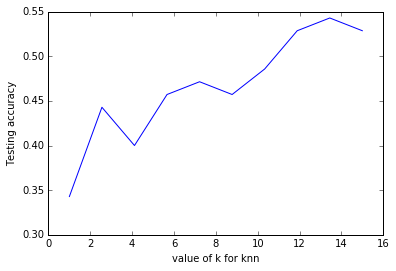

In [69]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k_range=np.linspace(start=1,stop=15, num=10)

scores=[]
for k in k_range:

    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(new_x_train,new_y_train)
    y_pred=knn.predict(new_x_test)
    scores.append(metrics.accuracy_score(new_y_test,y_pred))
    
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel('value of k for knn')
plt.ylabel('Testing accuracy')

In [86]:
### Applying knn on top 29 features features
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(new_x_train,new_y_train)
y_pred=knn.predict(new_x_test)
print(metrics.accuracy_score(new_y_test,y_pred))
print(metrics.precision_score(new_y_test,y_pred,average='macro'))
print(metrics.recall_score(new_y_test, y_pred, average='macro'))
print(metrics.f1_score(new_y_test, y_pred, average='macro'))
df3=new_y_test.as_matrix()
df4=np.array(df3)
df5=df4.ravel()
print(df5)
print(y_pred)

0.342857142857
0.294429050356
0.274774774775
0.27946969697
['0' '0' '0' '0' '1' '1' '0' '1' '0' '3' '2' '0' '1' '0' '1' '0' '2' '0'
 '0' '0' '2' '0' '3' '3' '0' '0' '0' '3' '1' '2' '2' '3' '0' '0' '1' '0'
 '1' '0' '1' '3' '0' '0' '1' '1' '3' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '2' '0' '0' '1' '1' '0' '0' '3' '2' '2' '0' '0' '3' '1' '2']
['0' '0' '3' '2' '0' '2' '1' '1' '2' '0' '0' '1' '3' '0' '1' '0' '1' '0'
 '1' '1' '0' '3' '0' '1' '2' '1' '1' '1' '0' '2' '0' '2' '0' '0' '0' '2'
 '2' '2' '2' '3' '0' '2' '0' '1' '0' '2' '0' '0' '3' '0' '3' '0' '0' '2'
 '1' '0' '2' '0' '2' '1' '0' '1' '1' '0' '0' '0' '2' '3' '1' '1']


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
#Applying Logistic Regression on same x_train,y_train,x_test and y_test for top 29 features
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(new_x_train,new_y_train)
y_pred=knn.predict(new_x_test)
print(metrics.accuracy_score(new_y_test,y_pred))
print(metrics.precision_score(new_y_test,y_pred,average='macro'))
print(metrics.recall_score(new_y_test, y_pred, average='macro'))
print(metrics.f1_score(new_y_test, y_pred, average='macro'))
df3=new_y_test.as_matrix()
df4=np.array(df5)
df5=b.ravel()
print(df6)
print(y_pred)